In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('baskets.csv')
df.head()

,basket_id,product
0,1,Bulgarian Yogurt
1,1,Organic 4% Milk Fat Whole Milk Cottage Cheese
2,1,Organic Celery Hearts
3,1,Cucumber Kirby
4,1,Lightly Smoked Sardines in Olive Oil


In [2]:
df['basket_id'].value_counts()

1395075    80
2813632    80
949182     77
2869702    76
341238     76
           ..
1144944     1
1144765     1
1144608     1
1144038     1
3214874     1
Name: basket_id, Length: 131209, dtype: int64

In [3]:
 df.groupby("basket_id").product.unique()

basket_id
1          [Bulgarian Yogurt, Organic 4% Milk Fat Whole M...
36         [Grated Pecorino Romano Cheese, Spring Water, ...
38         [Shelled Pistachios, Organic Biologique Limes,...
96         [Roasted Turkey, Organic Cucumber, Organic Gra...
98         [Natural Spring Water, Organic Orange Juice Wi...
                                 ...                        
3421049    [Gluten Free Rice Bread, Organic Whole Grain W...
3421056    [Total Plain Greek Strained Yogurt, Homestyle ...
3421058    [Wine Infused Salame Cheese and Crackers Small...
3421063    [Organic Half & Half, No Salt Added Gluten-Fre...
3421070    [Organic Unsweetened Almond Milk, Creamy Peanu...
Name: product, Length: 131209, dtype: object

In [4]:
df['product'].value_counts()

Banana                                           18726
Bag of Organic Bananas                           15480
Organic Strawberries                             10894
Organic Baby Spinach                              9784
Large Lemon                                       8135
                                                 ...  
Red Raspberry Syrup                                  1
Organic Montebello Penne Rigate Italian Pasta        1
ULTRACLEAN™ Arctic Mint Mouth Wash                   1
Torrential Tropical Punch                            1
Plain Golden Toasted Bread Crumbs                    1
Name: product, Length: 39123, dtype: int64

<AxesSubplot:xlabel='basket_id,product'>

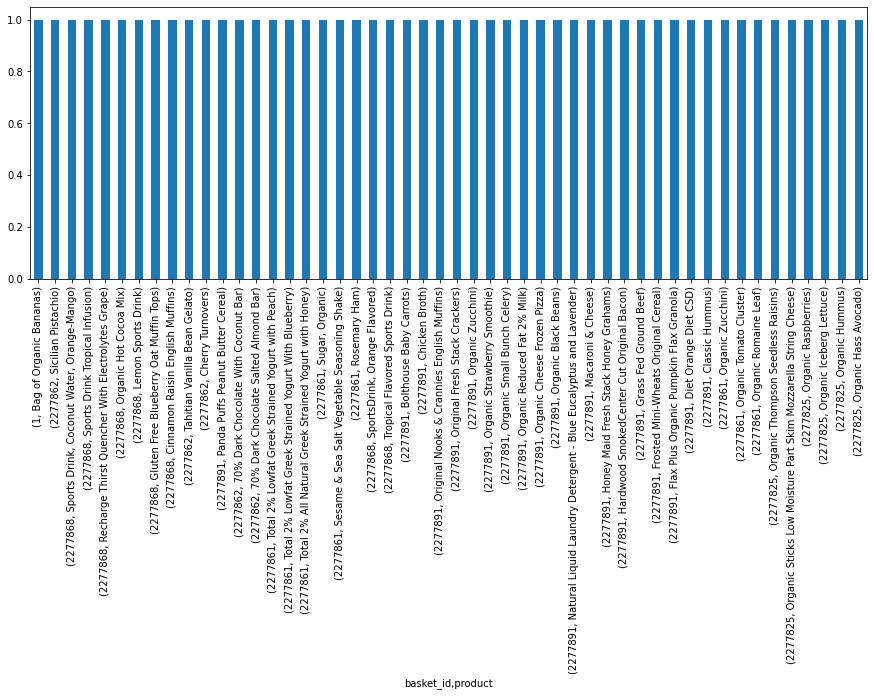

In [5]:
df.value_counts()[:50].plot(kind='bar', figsize=(15,5))

In [6]:
 df.groupby("basket_id").product.unique()

basket_id
1          [Bulgarian Yogurt, Organic 4% Milk Fat Whole M...
36         [Grated Pecorino Romano Cheese, Spring Water, ...
38         [Shelled Pistachios, Organic Biologique Limes,...
96         [Roasted Turkey, Organic Cucumber, Organic Gra...
98         [Natural Spring Water, Organic Orange Juice Wi...
                                 ...                        
3421049    [Gluten Free Rice Bread, Organic Whole Grain W...
3421056    [Total Plain Greek Strained Yogurt, Homestyle ...
3421058    [Wine Infused Salame Cheese and Crackers Small...
3421063    [Organic Half & Half, No Salt Added Gluten-Fre...
3421070    [Organic Unsweetened Almond Milk, Creamy Peanu...
Name: product, Length: 131209, dtype: object

In [7]:
# Print transactions header.
df.head()

,basket_id,product
0,1,Bulgarian Yogurt
1,1,Organic 4% Milk Fat Whole Milk Cottage Cheese
2,1,Organic Celery Hearts
3,1,Cucumber Kirby
4,1,Lightly Smoked Sardines in Olive Oil


In [12]:
# check for missing values
df.isnull().sum()

basket_id    0
product      0
dtype: int64

In [20]:
df.value_counts(normalize = True)[:10]

basket_id  product                                         
1          Bag of Organic Bananas                              7.222214e-07
2277862    Sicilian Pistachio                                  7.222214e-07
2277868    Sports Drink, Coconut Water, Orange-Mango           7.222214e-07
           Sports Drink Tropical Infusion                      7.222214e-07
           Recharge Thirst Quencher With Electrolytes Grape    7.222214e-07
           Organic Hot Cocoa Mix                               7.222214e-07
           Lemon Sports Drink                                  7.222214e-07
           Gluten Free Blueberry Oat Muffin Tops               7.222214e-07
           Cinnamon Raisin English Muffins                     7.222214e-07
2277862    Tahitian Vanilla Bean Gelato                        7.222214e-07
dtype: float64

In [27]:
df['product']= df['product'].str.strip() #removes spaces from beginning and end of sentences in the column 'product'
df.dropna(axis=0, subset=['basket_id'],inplace=True) #removes any duplicate 'Order' No.
df['basket_id']=df['basket_id'].astype('str')  #converting 'Order' No. to be string 
df = df[~df['basket_id'].str.contains('C')] #removing any credit Order No. if present any.
df.head()

,basket_id,product
0,1,Bulgarian Yogurt
1,1,Organic 4% Milk Fat Whole Milk Cottage Cheese
2,1,Organic Celery Hearts
3,1,Cucumber Kirby
4,1,Lightly Smoked Sardines in Olive Oil


In [44]:
mybasket= (df.groupby(['basket_id','product']).sum())

In [47]:
#viewing transaction basket
mybasket.head()

Empty DataFrame
Columns: []
Index: [(1, Bag of Organic Bananas), (1, Bulgarian Yogurt), (1, Cucumber Kirby), (1, Lightly Smoked Sardines in Olive Oil), (1, Organic 4% Milk Fat Whole Milk Cottage Cheese)]

In [48]:
def my_encode_units(x):
    if x <= 0:
        return 0
    if x>= 1:
        return 1
    
my_basket_sets =  mybasket.applymap(my_encode_units)

In [49]:
from apyori import apriori
#generating frequent itemsets
my_frequent_itemsets = apriori(my_basket_sets, min_support=0.07, use_colnames=True)
#considering the rules that have 0.07 support
#my_frequent_itemsets => type of transactions

In [50]:
#viewing top 100 rules
my_basket_sets.head(100)

Empty DataFrame
Columns: []
Index: [(1, Bag of Organic Bananas), (1, Bulgarian Yogurt), (1, Cucumber Kirby), (1, Lightly Smoked Sardines in Olive Oil), (1, Organic 4% Milk Fat Whole Milk Cottage Cheese), (1, Organic Celery Hearts), (1, Organic Hass Avocado), (1, Organic Whole String Cheese), (100000, Corn Tortillas), (100000, Extra Virgin Olive Oil), (100000, Gala Apples), (100000, Garnet Sweet Potato (Yam)), (100000, Ground Cumin), (100000, I Heart Baby Kale), (100000, No Salt Added Black Beans), (100000, Organic Baby Carrots), (100000, Organic Baby Spinach), (100000, Organic Yellow Onion), (100000, Original Hummus), (100000, Snack Sticks Chicken & Rice Recipe Dog Treats), (100000, Total 2% All Natural Plain Greek Yogurt), (100000, Unscented Long Lasting Stick Deodorant), (100000, Wheat Sandwich Thins), (1000008, Daily Moisture Shampoo), (1000008, DeTox Caffeine Free Organic Herbal Tea Bags), (1000008, Ensure Plus Milk Chocolate Nutrition Shake), (1000008, G Series Perform Frost Glacier Cherry Sports Drink), (1000008, Original No Pulp 100% Florida Orange Juice), (1000008, Triple Chocolate Ripple), (1000008, ZzzQuil Liquid Warming Berry Flavor Sleep-Aid), (1000029, Almond Chia Granola Clusters), (1000029, Boneless Skinless Chicken Breasts), (1000029, Broccoli Crown), (1000029, Fresh Cauliflower), (1000029, Orange Bell Pepper), (1000029, Organic Gala Apples), (1000029, Organic Red Onion), (1000029, Veggie Chips), (100003, Cereal), (100003, Organic Salted Butter), (1000046, 2% Reduced Fat DHA Omega-3 Reduced Fat Milk), (1000046, All-Natural Autumn Apple  Fruit Strip), (1000046, All-Natural Harvest Grape Fruit Strip), (1000046, All-Natural Orchard Cherry Fruit Strip), (1000046, Apples, Pumpkin & Carrots Organic Baby Food), (1000046, Baby Food Pears Squash), (1000046, Bag of Organic Bananas), (1000046, Bananas, Raspberries & Oats Organic Baby Food), (1000046, Brussels Sprouts), (1000046, Cucumber Kirby), (1000046, Diced Tomatoes), (1000046, Electrolyte Enhanced Water), (1000046, Ground Turkey Breast), (1000046, Jalapeno Peppers), (1000046, Large Grapefruit), (1000046, Organic Avocado), (1000046, Organic Chicken Broth), (1000046, Organic Chicken Stock), (1000046, Organic Chocolate Chip Chewy Granola Bars), (1000046, Organic Grade A Large Brown Eggs), (1000046, Organic Red Bell Pepper), (1000046, Organic Spring Mix), (1000046, Organic Sweet Mini Peppers), (1000046, Organic Whole Kernel Sweet Corn No Salt Added), (1000046, Organic Yellow Onion), (1000046, Parsley, Italian (Flat), New England Grown), (1000046, Ripened Raspberry Fruit Leather), (1000046, Saffron Threads), (1000046, Shredded Mild Cheddar Cheese), (1000046, Stage 2 Pear Pumpkin Baby Food), (1000046, Summer Strawberry Fruit Strip), (1000046, Total 2% with Strawberry Lowfat Greek Strained Yogurt), (1000080, Full Head Medium Toothbrush), (1000080, Gluten Free Pretzel Sticks), (1000080, Mint Chip Almond Milk Non-Dairy Frozen Dessert), (1000080, Oatneal Cookie Ice Cream), (1000080, Organic Bagged Mini Dark Peanut Butter), (1000080, Organic Fuji Apple), (1000080, Raw Cheddar Chips), (1000162, 2% Reduced Fat Milk), (1000162, Apple Sauce), (1000162, Baby Spinach), (1000162, Bac'n Pieces), (1000162, Banana), (1000162, Blueberries), (1000162, Eggo Blueberry Waffles), (1000162, Gala Apples), (1000162, Kale), (1000162, Medium Scarlet Raspberries), (1000162, Mexican Style Rice & Pasta), (1000162, Multigrain Waffles), (1000162, Natural Bliss Hazelnut Coffee Creamer), (1000162, Organic Blueberries), (1000162, Organic Strawberries), (1000162, Organic Tomato Cluster), (1000162, Original Nooks & Crannies Cinnamon Raisin English Muffins), (1000162, Original Real Crumbled Bacon), (1000162, Premium Italian Seasoned Croutons), (1000162, Special K Sausage, Egg & Cheese Flatbread Breakfast Sandwich), (1000162, Total 2% Greek Strained Yogurt with Cherry 5.3 oz)]

[100 rows x 0 columns]

In [53]:
import pandas as pd

df1 = pd.read_csv('baskets.csv')
df2 = pd.read_csv('airroutes.csv')

data = pd.concat([df1,df2])
data.head()

,basket_id,product,from,to
0,1.0,Bulgarian Yogurt,NaN,NaN
1,1.0,Organic 4% Milk Fat Whole Milk Cottage Cheese,NaN,NaN
2,1.0,Organic Celery Hearts,NaN,NaN
3,1.0,Cucumber Kirby,NaN,NaN
4,1.0,Lightly Smoked Sardines in Olive Oil,NaN,NaN
